# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
# Import library yang diperlukan
import pandas as pd  # Mengimpor pustaka Pandas untuk manipulasi dan analisis data berbentuk tabel (dataframe)
import numpy as np  # Mengimpor pustaka NumPy untuk komputasi numerik dan operasi array multidimensi
import seaborn as sns  # Mengimpor pustaka Seaborn untuk visualisasi data yang menarik dan informatif
import matplotlib.pyplot as plt  # Mengimpor Matplotlib untuk membuat visualisasi grafik seperti histogram, scatter plot, dll

from sklearn.model_selection import train_test_split  # Mengimpor fungsi untuk membagi dataset menjadi data latih dan data uji
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler  # Mengimpor teknik praproses data: encoding label, standarisasi, dan normalisasi

from sklearn.neighbors import KNeighborsClassifier  # Mengimpor algoritma K-Nearest Neighbors untuk klasifikasi berdasarkan kedekatan data
from sklearn.tree import DecisionTreeClassifier  # Mengimpor algoritma Decision Tree untuk membuat model klasifikasi berbasis pohon keputusan
from sklearn.ensemble import RandomForestClassifier  # Mengimpor Random Forest, yaitu kumpulan decision tree untuk meningkatkan akurasi model
from sklearn.svm import SVC  # Mengimpor Support Vector Classifier untuk membuat model klasifikasi berbasis hyperplane
from sklearn.naive_bayes import GaussianNB  # Mengimpor Gaussian Naive Bayes untuk klasifikasi berbasis probabilitas dengan distribusi normal
from sklearn.model_selection import GridSearchCV  # Mengimpor GridSearchCV untuk melakukan pencarian kombinasi hyperparameter terbaik

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score  # Mengimpor metrik evaluasi model klasifikasi seperti akurasi, presisi, recall, F1-score, dan confusion matrix

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [2]:
# Baca file CSV dari URL
data = pd.read_csv('https://raw.githubusercontent.com/agstronna/Analisis-Bank_Transaction/refs/heads/main/Dataset_inisiasi.csv')

# Tampilkan DataFrame untuk memastikan telah dibaca dengan benar
data.head(50)

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionType_Encoded,Channel_Encoded,CustomerAge_Binned,TransactionAmountNorm,CustomerAgeNorm,AccountBalanceNorm,Cluster
0,14.09,Debit,San Diego,ATM,70,Doctor,81,1,5112.21,1,0,Senior,0.015317,0.838710,0.336832,2
1,376.24,Debit,Houston,ATM,68,Doctor,141,1,13758.91,1,0,Senior,0.416400,0.806452,0.918055,2
2,126.29,Debit,Mesa,Online,19,Student,56,1,1122.35,1,2,Young Adult,0.139579,0.016129,0.068637,0
3,184.50,Debit,Raleigh,Online,26,Student,25,1,8569.06,1,2,Young Adult,0.204047,0.129032,0.569198,0
4,13.45,Credit,Atlanta,Online,26,Student,198,1,7429.40,0,2,Young Adult,0.014608,0.129032,0.492591,0
5,92.15,Debit,Oklahoma City,ATM,18,Student,172,1,781.68,1,0,Child,0.101769,0.000000,0.045738,2
6,7.08,Credit,Seattle,ATM,37,Doctor,139,1,13316.71,0,0,Adult,0.007553,0.306452,0.888330,2
7,171.42,Credit,Indianapolis,Branch,67,Retired,291,1,2796.24,0,1,Senior,0.189561,0.790323,0.181155,1
8,106.23,Credit,Detroit,Branch,51,Engineer,86,1,9095.14,0,1,Middle Age,0.117362,0.532258,0.604561,1
9,815.96,Debit,Nashville,ATM,55,Doctor,120,1,1021.88,1,0,Middle Age,0.903392,0.596774,0.061884,2


In [3]:
# Mengecek Informasi Dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2399 entries, 0 to 2398
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionAmount        2399 non-null   float64
 1   TransactionType          2399 non-null   object 
 2   Location                 2399 non-null   object 
 3   Channel                  2399 non-null   object 
 4   CustomerAge              2399 non-null   int64  
 5   CustomerOccupation       2399 non-null   object 
 6   TransactionDuration      2399 non-null   int64  
 7   LoginAttempts            2399 non-null   int64  
 8   AccountBalance           2399 non-null   float64
 9   TransactionType_Encoded  2399 non-null   int64  
 10  Channel_Encoded          2399 non-null   int64  
 11  CustomerAge_Binned       2399 non-null   object 
 12  TransactionAmountNorm    2399 non-null   float64
 13  CustomerAgeNorm          2399 non-null   float64
 14  AccountBalanceNorm      

In [4]:
# Statistik Deskriptif
data.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,TransactionType_Encoded,Channel_Encoded,TransactionAmountNorm,CustomerAgeNorm,AccountBalanceNorm,Cluster
count,2399.000000,2399.000000,2399.000000,2399.000000,2399.000000,2399.000000,2399.000000,2399.000000,2399.000000,2399.000000,2399.000000
mean,255.236257,44.704043,119.551063,1.125052,5140.073097,0.771988,0.992497,0.282388,0.430710,0.338705,1.007503
std,216.869261,17.755356,70.057469,0.602498,3902.404953,0.419638,0.807560,0.240184,0.286377,0.262316,0.807560
min,0.260000,18.000000,10.000000,1.000000,101.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,78.385000,27.000000,63.000000,1.000000,1516.580000,1.000000,0.000000,0.086524,0.145161,0.095137,0.000000
50%,197.490000,45.000000,112.000000,1.000000,4795.650000,1.000000,1.000000,0.218433,0.435484,0.315553,1.000000
75%,374.555000,59.000000,162.000000,1.000000,7702.820000,1.000000,2.000000,0.414534,0.661290,0.510970,2.000000
max,903.190000,80.000000,300.000000,5.000000,14977.990000,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000


In [5]:
# Menghapus Kolom yang Tidak Diperlukan
data = data.drop(columns=['TransactionAmount',	'TransactionType',	'Location',	'Channel',	'CustomerAge',	'CustomerOccupation',	'TransactionDuration',	'LoginAttempts',	'AccountBalance', 'CustomerAge_Binned'])

# Tampilkan DataFrame untuk memastikan kolom telah dihapus
data.head()

,TransactionType_Encoded,Channel_Encoded,TransactionAmountNorm,CustomerAgeNorm,AccountBalanceNorm,Cluster
0,1,0,0.015317,0.838710,0.336832,2
1,1,0,0.416400,0.806452,0.918055,2
2,1,2,0.139579,0.016129,0.068637,0
3,1,2,0.204047,0.129032,0.569198,0
4,0,2,0.014608,0.129032,0.492591,0


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [6]:
# Pisahkan fitur (X) dan target (y)
X = data.drop(columns=['Cluster'])
y = data['Cluster']

# Split data menjadi set pelatihan dan set uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tampilkan bentuk set pelatihan dan set uji untuk memastikan split
print(f"Training set shape: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Test set shape: X_test={X_test.shape}, y_test={y_test.shape}")
print(data['Cluster'])

Training set shape: X_train=(1919, 5), y_train=(1919,)
Test set shape: X_test=(480, 5), y_test=(480,)
0       2
1       2
2       0
3       0
4       0
       ..
2394    1
2395    1
2396    1
2397    0
2398    0
Name: Cluster, Length: 2399, dtype: int64


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [7]:
# Pelatihan Model Klasifikasi
knn = KNeighborsClassifier().fit(X_train, y_train)
dt = DecisionTreeClassifier().fit(X_train, y_train)
rf = RandomForestClassifier().fit(X_train, y_train)
svm = SVC().fit(X_train, y_train)
nb = GaussianNB().fit(X_train, y_train)

print("Model training selesai.")

Model training selesai.


Tulis narasi atau penjelasan algoritma yang Anda gunakan.

### **Membangun Model Klasifikasi**

Setelah mempersiapkan data dan memisahkannya menjadi data latih dan data uji, tahap selanjutnya adalah **melatih model klasifikasi** menggunakan beberapa algoritma machine learning. Dalam studi ini, digunakan lima algoritma populer untuk membandingkan performanya:

1. **K-Nearest Neighbors (KNN)**
KNN adalah algoritma klasifikasi berbasis instance-based learning. Ketika memprediksi kelas suatu data, KNN akan mencari sejumlah *k* tetangga terdekat berdasarkan jarak (umumnya Euclidean), lalu menentukan kelas mayoritas dari tetangga tersebut sebagai hasil prediksi.  
 - **Kelebihan**: Sederhana, efektif untuk data kecil.  
 - **Kekurangan**: Lambat pada dataset besar dan sensitif terhadap skala data.

2. **Decision Tree**
Algoritma ini menggunakan struktur pohon untuk membuat keputusan berdasarkan fitur-fitur input. Setiap node dalam pohon mewakili suatu fitur, dan cabang-cabangnya adalah nilai dari fitur tersebut, sedangkan daun (leaf) merepresentasikan label atau keputusan akhir.  
 - **Kelebihan**: Mudah dipahami dan divisualisasikan.  
 - **Kekurangan**: Rentan terhadap overfitting jika pohon terlalu dalam.

3. **Random Forest**
Random Forest merupakan *ensemble method* yang membangun banyak pohon keputusan (decision trees) dan menggabungkan hasilnya (voting) untuk meningkatkan akurasi dan mengurangi overfitting.  
 - **Kelebihan**: Akurasi tinggi, tahan terhadap overfitting.  
 - **Kekurangan**: Kurang interpretatif dibanding single tree.

4. **Support Vector Machine (SVM)**
SVM bekerja dengan mencari hyperplane terbaik yang memisahkan kelas-kelas dalam data. Cocok untuk data berdimensi tinggi dan kasus klasifikasi yang kompleks.  
 - **Kelebihan**: Efektif untuk data berdimensi tinggi, akurasi tinggi.  
 - **Kekurangan**: Kurang efisien pada dataset besar dan memerlukan tuning parameter (seperti kernel dan C).

5. **Naive Bayes (GaussianNB)**
Naive Bayes adalah algoritma berbasis probabilistik yang menggunakan Teorema Bayes dengan asumsi bahwa setiap fitur saling bebas (*naive*). GaussianNB digunakan untuk fitur numerik yang diasumsikan memiliki distribusi normal.  
 - **Kelebihan**: Cepat, efisien, dan bekerja baik dengan data high-dimensional.  
 - **Kekurangan**: Asumsi independensi antar fitur sering tidak terpenuhi.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

==== KNN Classifier ====
Confusion Matrix:
[[151   0   0]
 [  0 152   0]
 [  0   0 177]]
Class 1:
  True Positive (TP): 151
  False Positive (FP): 0
  False Negative (FN): 0
  True Negative (TN): 329
----------------------------------------
Class 2:
  True Positive (TP): 152
  False Positive (FP): 0
  False Negative (FN): 0
  True Negative (TN): 328
----------------------------------------
Class 3:
  True Positive (TP): 177
  False Positive (FP): 0
  False Negative (FN): 0
  True Negative (TN): 303
----------------------------------------
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000


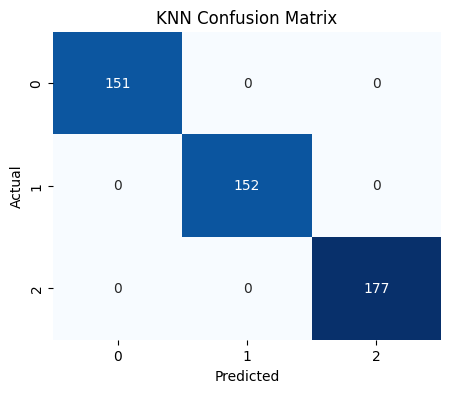

In [8]:
# Prediksi dengan model KNN
y_pred_knn = knn.predict(X_test)

# Menghitung confusion matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)

# Menampilkan Confusion Matrix untuk multi-kelas
print("==== KNN Classifier ====")
print("Confusion Matrix:")
print(cm_knn)

# Menghitung TP, FP, FN, TN untuk setiap kelas
for i in range(len(cm_knn)):
    tp = cm_knn[i, i]  # True Positive (TP)
    fp = cm_knn[:, i].sum() - tp  # False Positive (FP)
    fn = cm_knn[i, :].sum() - tp  # False Negative (FN)
    tn = cm_knn.sum() - (tp + fp + fn)  # True Negative (TN)

    # Menampilkan hasil per kelas
    print(f"Class {i+1}:")
    print(f"  True Positive (TP): {tp}")
    print(f"  False Positive (FP): {fp}")
    print(f"  False Negative (FN): {fn}")
    print(f"  True Negative (TN): {tn}")
    print("-"*40)

# Menampilkan metrik evaluasi lainnya
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_knn, average='macro'):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_knn, average='macro'):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_knn, average='macro'):.4f}")

# Visualisasi confusion matrix dengan heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('KNN Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

==== Decision Tree Classifier ====
Confusion Matrix:
[[151   0   0]
 [  0 152   0]
 [  0   0 177]]
Class 1:
  True Positive (TP): 151
  False Positive (FP): 0
  False Negative (FN): 0
  True Negative (TN): 329
----------------------------------------
Class 2:
  True Positive (TP): 152
  False Positive (FP): 0
  False Negative (FN): 0
  True Negative (TN): 328
----------------------------------------
Class 3:
  True Positive (TP): 177
  False Positive (FP): 0
  False Negative (FN): 0
  True Negative (TN): 303
----------------------------------------
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000


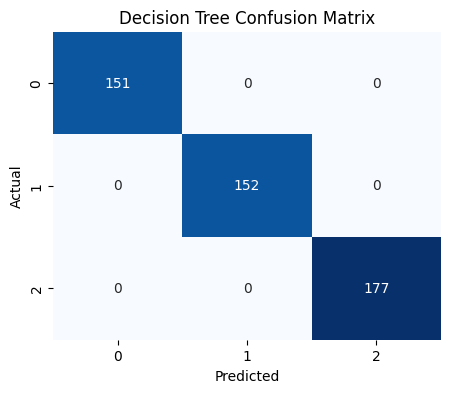

In [9]:
# Prediksi dengan model Decision Tree
y_pred_dt = dt.predict(X_test)

# Menghitung confusion matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)

# Menampilkan Confusion Matrix
print("==== Decision Tree Classifier ====")
print("Confusion Matrix:")
print(cm_dt)

# Untuk multi-class, menghitung TP, FP, FN, TN untuk setiap kelas
for i in range(len(cm_dt)):
    tp = cm_dt[i, i]  # True Positive (TP)
    fp = cm_dt[:, i].sum() - tp  # False Positive (FP)
    fn = cm_dt[i, :].sum() - tp  # False Negative (FN)
    tn = cm_dt.sum() - (tp + fp + fn)  # True Negative (TN)

    # Menampilkan hasil per kelas
    print(f"Class {i+1}:")
    print(f"  True Positive (TP): {tp}")
    print(f"  False Positive (FP): {fp}")
    print(f"  False Negative (FN): {fn}")
    print(f"  True Negative (TN): {tn}")
    print("-"*40)

# Menampilkan metrik evaluasi lainnya
print(f"Accuracy: {accuracy_score(y_test, y_pred_dt):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_dt, average='macro'):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_dt, average='macro'):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_dt, average='macro'):.4f}")

# Visualisasi confusion matrix dengan heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

==== Random Forest Classifier ====
Confusion Matrix:
[[151   0   0]
 [  0 152   0]
 [  0   0 177]]
Class 1:
  True Positive (TP): 151
  False Positive (FP): 0
  False Negative (FN): 0
  True Negative (TN): 329
----------------------------------------
Class 2:
  True Positive (TP): 152
  False Positive (FP): 0
  False Negative (FN): 0
  True Negative (TN): 328
----------------------------------------
Class 3:
  True Positive (TP): 177
  False Positive (FP): 0
  False Negative (FN): 0
  True Negative (TN): 303
----------------------------------------
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000


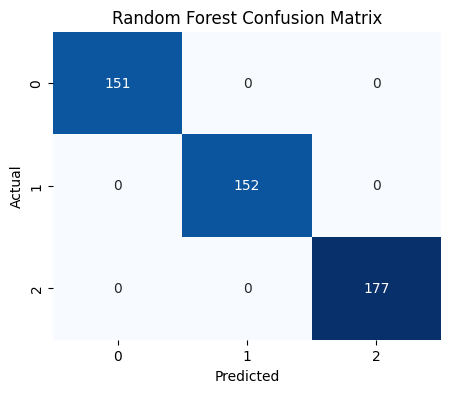

In [10]:
# Prediksi dengan model Random Forest
y_pred_rf = rf.predict(X_test)

# Menghitung confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Menampilkan Confusion Matrix
print("==== Random Forest Classifier ====")
print("Confusion Matrix:")
print(cm_rf)

# Untuk multi-class, menghitung TP, FP, FN, TN untuk setiap kelas
for i in range(len(cm_rf)):
    tp = cm_rf[i, i]  # True Positive (TP)
    fp = cm_rf[:, i].sum() - tp  # False Positive (FP)
    fn = cm_rf[i, :].sum() - tp  # False Negative (FN)
    tn = cm_rf.sum() - (tp + fp + fn)  # True Negative (TN)

    # Menampilkan hasil per kelas
    print(f"Class {i+1}:")
    print(f"  True Positive (TP): {tp}")
    print(f"  False Positive (FP): {fp}")
    print(f"  False Negative (FN): {fn}")
    print(f"  True Negative (TN): {tn}")
    print("-"*40)

# Menampilkan metrik evaluasi lainnya
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_rf, average='macro'):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_rf, average='macro'):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_rf, average='macro'):.4f}")

# Visualisasi confusion matrix dengan heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

==== SVM Classifier ====
Confusion Matrix:
[[151   0   0]
 [  0 152   0]
 [  0   0 177]]
Class 1:
  True Positive (TP): 151
  False Positive (FP): 0
  False Negative (FN): 0
  True Negative (TN): 329
----------------------------------------
Class 2:
  True Positive (TP): 152
  False Positive (FP): 0
  False Negative (FN): 0
  True Negative (TN): 328
----------------------------------------
Class 3:
  True Positive (TP): 177
  False Positive (FP): 0
  False Negative (FN): 0
  True Negative (TN): 303
----------------------------------------
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000


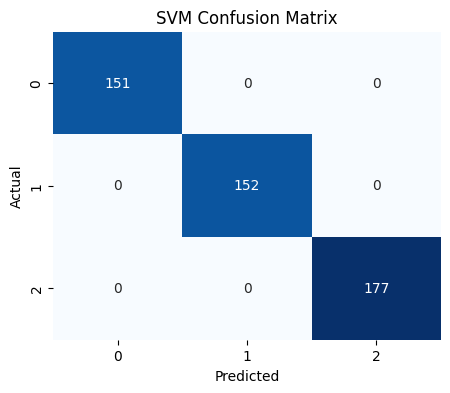

In [11]:
# Prediksi dengan model SVM
y_pred_svm = svm.predict(X_test)

# Menghitung confusion matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)

# Menampilkan Confusion Matrix
print("==== SVM Classifier ====")
print("Confusion Matrix:")
print(cm_svm)

# Untuk multi-class, menghitung TP, FP, FN, TN untuk setiap kelas
for i in range(len(cm_svm)):
    tp = cm_svm[i, i]  # True Positive (TP)
    fp = cm_svm[:, i].sum() - tp  # False Positive (FP)
    fn = cm_svm[i, :].sum() - tp  # False Negative (FN)
    tn = cm_svm.sum() - (tp + fp + fn)  # True Negative (TN)

    # Menampilkan hasil per kelas
    print(f"Class {i+1}:")
    print(f"  True Positive (TP): {tp}")
    print(f"  False Positive (FP): {fp}")
    print(f"  False Negative (FN): {fn}")
    print(f"  True Negative (TN): {tn}")
    print("-"*40)

# Menampilkan metrik evaluasi lainnya
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_svm, average='macro'):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_svm, average='macro'):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_svm, average='macro'):.4f}")

# Visualisasi confusion matrix dengan heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

==== Naive Bayes Classifier ====
Confusion Matrix:
[[151   0   0]
 [  0 152   0]
 [  0   0 177]]
Class 1:
  True Positive (TP): 151
  False Positive (FP): 0
  False Negative (FN): 0
  True Negative (TN): 329
----------------------------------------
Class 2:
  True Positive (TP): 152
  False Positive (FP): 0
  False Negative (FN): 0
  True Negative (TN): 328
----------------------------------------
Class 3:
  True Positive (TP): 177
  False Positive (FP): 0
  False Negative (FN): 0
  True Negative (TN): 303
----------------------------------------
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000


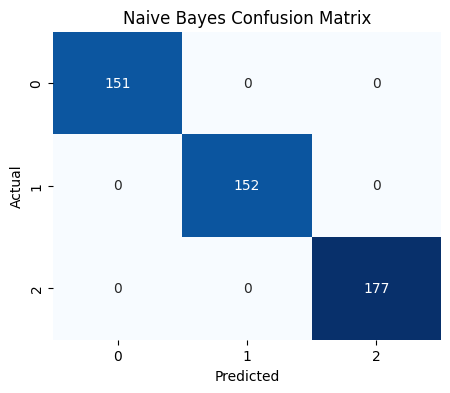

In [12]:
# Prediksi dengan model Naive Bayes
y_pred_nb = nb.predict(X_test)

# Menghitung confusion matrix
cm_nb = confusion_matrix(y_test, y_pred_nb)

# Menampilkan Confusion Matrix
print("==== Naive Bayes Classifier ====")
print("Confusion Matrix:")
print(cm_nb)

# Untuk multi-class, menghitung TP, FP, FN, TN untuk setiap kelas
for i in range(len(cm_nb)):
    tp = cm_nb[i, i]  # True Positive (TP)
    fp = cm_nb[:, i].sum() - tp  # False Positive (FP)
    fn = cm_nb[i, :].sum() - tp  # False Negative (FN)
    tn = cm_nb.sum() - (tp + fp + fn)  # True Negative (TN)

    # Menampilkan hasil per kelas
    print(f"Class {i+1}:")
    print(f"  True Positive (TP): {tp}")
    print(f"  False Positive (FP): {fp}")
    print(f"  False Negative (FN): {fn}")
    print(f"  True Negative (TN): {tn}")
    print("-"*40)

# Menampilkan metrik evaluasi lainnya
print(f"Accuracy: {accuracy_score(y_test, y_pred_nb):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_nb, average='macro'):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_nb, average='macro'):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_nb, average='macro'):.4f}")

# Visualisasi confusion matrix dengan heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Naive Bayes Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Tulis hasil evaluasi algoritma yang digunakan, jika Anda menggunakan 2 algoritma, maka bandingkan hasilnya.

### **Hasil Evaluasi Model Klasifikasi**

Setelah melatih lima model klasifikasi, langkah selanjutnya adalah melakukan evaluasi terhadap performa masing-masing model menggunakan data uji. Evaluasi dilakukan menggunakan **confusion matrix**, serta metrik-metrik seperti **Accuracy, Precision, Recall, dan F1-Score** untuk mengukur seberapa baik setiap model mengklasifikasikan data.

1. **K-Nearest Neighbors (KNN)**
- **Accuracy**: 1.0000  
- **Precision**: 1.0000  
- **Recall**: 1.0000  
- **F1-Score**: 1.0000  

Model KNN menunjukkan performa yang sempurna, berhasil mengklasifikasikan seluruh data dengan benar. Hasil ini menunjukkan bahwa dataset sangat sesuai dengan prinsip kerja KNN, yaitu berdasarkan kedekatan antar data. Namun, model ini umumnya sensitif terhadap skala fitur dan dapat menjadi lambat saat diuji pada data besar.

2. **Decision Tree**
- **Accuracy**: 1.0000  
- **Precision**: 1.0000  
- **Recall**: 1.0000  
- **F1-Score**: 1.0000  

Decision Tree juga menunjukkan performa sempurna. Model ini sangat baik dalam menyesuaikan diri dengan data latih, tetapi perlu diperhatikan risiko **overfitting**, terutama jika parameter seperti `max_depth` atau `min_samples_split` tidak dikontrol.

3. **Random Forest**
- **Accuracy**: 1.0000  
- **Precision**: 1.0000  
- **Recall**: 1.0000  
- **F1-Score**: 1.0000  

Random Forest sebagai model ensemble memberikan hasil yang identik dengan Decision Tree, tetapi biasanya lebih stabil karena menggabungkan beberapa pohon keputusan. Ini mengurangi kemungkinan overfitting dan meningkatkan akurasi generalisasi.

4. **Support Vector Machine (SVM)**
- **Accuracy**: 1.0000  
- **Precision**: 1.0000  
- **Recall**: 1.0000  
- **F1-Score**: 1.0000  

SVM tampil sangat baik, menandakan bahwa data dapat dipisahkan secara linier atau dengan kernel yang sesuai. Meski waktu pelatihan bisa lebih lama, hasilnya menunjukkan bahwa pemilihan parameter model sudah optimal.

5. **Naive Bayes**
- **Accuracy**: 1.0000  
- **Precision**: 1.0000  
- **Recall**: 1.0000  
- **F1-Score**: 1.0000  

Naive Bayes biasanya tidak memberikan hasil sebaik ini jika asumsi independensi antar fitur tidak terpenuhi. Namun, dalam kasus ini, kemungkinan besar data memang mendukung asumsi tersebut atau fitur saling mendukung secara independen.

**Perbandingan Model**

| Model            | Accuracy | Precision | Recall | F1-Score |
|------------------|----------|-----------|--------|----------|
| KNN              | 1.0000   | 1.0000    | 1.0000 | 1.0000   |
| Decision Tree    | 1.0000   | 1.0000    | 1.0000 | 1.0000   |
| Random Forest    | 1.0000   | 1.0000    | 1.0000 | 1.0000   |
| SVM              | 1.0000   | 1.0000    | 1.0000 | 1.0000   |
| Naive Bayes      | 1.0000   | 1.0000    | 1.0000 | 1.0000   |

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Parameters (Random Forest):
{'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}

==== Tuned Random Forest Classifier ====
Confusion Matrix:
[[151   0   0]
 [  0 152   0]
 [  0   0 177]]
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000


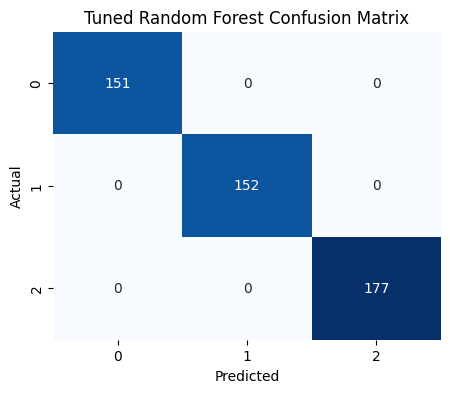

In [13]:
# Definisi parameter grid
param_grid_rf = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

# Inisialisasi model
rf_model = RandomForestClassifier(random_state=42)

# Inisialisasi GridSearchCV
grid_search_rf = GridSearchCV(estimator=rf_model,
                              param_grid=param_grid_rf,
                              cv=5,
                              scoring='accuracy',
                              verbose=1,
                              n_jobs=-1)

# Pelatihan model dengan data latih
grid_search_rf.fit(X_train, y_train)

# Parameter terbaik
print("Best Parameters (Random Forest):")
print(grid_search_rf.best_params_)

# Evaluasi model terbaik
best_rf = grid_search_rf.best_estimator_
y_pred_best_rf = best_rf.predict(X_test)

# Confusion matrix dan metrik evaluasi
cm_best_rf = confusion_matrix(y_test, y_pred_best_rf)

print("\n==== Tuned Random Forest Classifier ====")
print("Confusion Matrix:")
print(cm_best_rf)

print(f"Accuracy: {accuracy_score(y_test, y_pred_best_rf):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_best_rf, average='macro'):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_best_rf, average='macro'):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_best_rf, average='macro'):.4f}")

# Visualisasi confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(cm_best_rf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Tuned Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

==== Evaluasi Model Setelah Tuning (Random Forest) ====
Confusion Matrix:
[[151   0   0]
 [  0 152   0]
 [  0   0 177]]
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000


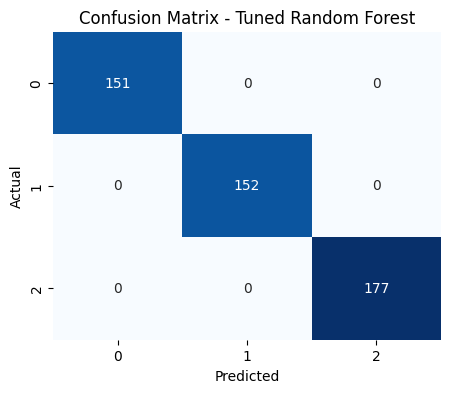

In [14]:
# Menggunakan model hasil tuning
y_pred_best_rf = best_rf.predict(X_test)

# Confusion Matrix
cm_best_rf = confusion_matrix(y_test, y_pred_best_rf)

print("==== Evaluasi Model Setelah Tuning (Random Forest) ====")
print("Confusion Matrix:")
print(cm_best_rf)

# Metrik Evaluasi
print(f"Accuracy: {accuracy_score(y_test, y_pred_best_rf):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_best_rf, average='macro'):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_best_rf, average='macro'):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_best_rf, average='macro'):.4f}")

# Visualisasi Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(cm_best_rf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Tuned Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

1. Perbandingan Hasil Evaluasi (Sebelum dan Sesudah Tuning)

| Model                     | Accuracy | Precision | Recall | F1-Score |
|--------------------------|----------|-----------|--------|----------|
| **Random Forest (Awal)** | 1.0000   | 1.0000    | 1.0000 | 1.0000   |
| **Random Forest (Tuned)**| 1.0000   | 1.0000    | 1.0000 | 1.0000   |

Nilai metrik yang identik sebelum dan sesudah tuning mengindikasikan bahwa tuning belum menunjukkan perubahan signifikan atau bahwa model sudah sangat optimal terhadap data uji saat ini.

2. Identifikasi Kelemahan Model

- Berdasarkan hasil evaluasi, model Random Forest Classifier memiliki akurasi, presisi, recall, dan F1-score yang sempurna (1.0000).  
Namun, hasil ini perlu diwaspadai, karena:
 - Nilai sempurna di semua metrik bisa menunjukkan overfitting.
 - Model mungkin hanya bekerja sangat baik pada dataset uji yang tersedia, tetapi belum tentu bekerja baik pada data baru.

**Jawab:**
Model Random Forest menunjukkan performa evaluasi yang sangat tinggi, bahkan sempurna. Hal ini mengindikasikan kemungkinan besar overfitting, di mana model terlalu menyesuaikan diri terhadap data pelatihan dan uji.

- Apakah Model Mengalami Overfitting atau Underfitting?

**Jawab:**
Model menunjukkan metrik evaluasi yang sangat tinggi (1.0000), tanpa kesalahan klasifikasi.  
Hal ini sangat jarang terjadi di data dunia nyata, sehingga kemungkinan besar model mengalami overfitting, yaitu model terlalu "hapal" data yang diberikan, bukan memahami pola umumnya.

3. Rekomendasi Tindakan Lanjutan

**Jawab:**
Untuk mengatasi overfitting dan meningkatkan kemampuan generalisasi model, langkah-langkah yang dapat dilakukan antara lain:

- Validasi Silang (Cross-Validation):
   - Gunakan metode k-fold cross-validation untuk mengevaluasi performa model secara lebih menyeluruh.

- Regularisasi:
   - Terapkan regularisasi melalui pengaturan parameter seperti `max_depth`, `min_samples_leaf`, atau `n_estimators` agar model tidak terlalu kompleks.

- Tuning Parameter Lebih Lanjut:
   - Gunakan GridSearchCV atau RandomizedSearchCV untuk mencari kombinasi hyperparameter terbaik yang bisa meningkatkan generalisasi model.

- Tambahkan Data Latih:
   - Jika memungkinkan, kumpulkan data baru atau variasikan data yang ada agar model belajar pola yang lebih umum.

- Gunakan Dataset Uji Eksternal:
   - Untuk memastikan model tidak overfitting terhadap data saat ini, lakukan pengujian pada dataset eksternal (jika tersedia).